In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import seaborn as sns
import numpy as np

Collecting the data and parsing it to a pandas dataframe

In [7]:
response=requests.get ('https://opendata.ecdc.europa.eu/covid19/casedistribution/json')
contents=response.json()
world=pd.DataFrame(contents['records'])

Cleaning the data


In [8]:
world.iloc[:,1:5]=world.iloc[:,1:5].astype(int)
world.iloc[:,9]=world.iloc[:,9].replace('',0)
world.continentExp=world.continentExp.astype(str)
world.dateRep=pd.to_datetime(world.dateRep,format='%d/%m/%Y')
world.set_index('dateRep',inplace=True)
world.deaths=world.deaths.astype(int)
world=world[world.countriesAndTerritories!='Cases_on_an_international_conveyance_Japan']


Listing the available continents




In [9]:

world['continentExp'].unique()


array(['Asia', 'Europe', 'Africa', 'America', 'Oceania'], dtype=object)

So we have Asia, Europe, Africa, America, and Oceania (mostly relates to Australia and neighbouring islands) and others.

In [10]:
america=world[world['continentExp']=='America']
america

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2020-06-17,17,6,2020,0,0,Anguilla,AI,,0,America
2020-06-16,16,6,2020,0,0,Anguilla,AI,,0,America
2020-06-15,15,6,2020,0,0,Anguilla,AI,,0,America
2020-06-14,14,6,2020,0,0,Anguilla,AI,,0,America
2020-06-13,13,6,2020,0,0,Anguilla,AI,,0,America
...,...,...,...,...,...,...,...,...,...,...
2020-03-19,19,3,2020,0,0,Venezuela,VE,VEN,28870195,America
2020-03-18,18,3,2020,0,0,Venezuela,VE,VEN,28870195,America
2020-03-17,17,3,2020,18,0,Venezuela,VE,VEN,28870195,America


A quick look at the america dataset reveals that its got the South American countries in it as well.

In [11]:
america['countriesAndTerritories'].unique()

array(['Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Aruba', 'Bahamas',
       'Barbados', 'Belize', 'Bermuda', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Brazil',
       'British_Virgin_Islands', 'Canada', 'Cayman_Islands', 'Chile',
       'Colombia', 'Costa_Rica', 'Cuba', 'Curaçao', 'Dominica',
       'Dominican_Republic', 'Ecuador', 'El_Salvador',
       'Falkland_Islands_(Malvinas)', 'Greenland', 'Grenada', 'Guatemala',
       'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Montserrat',
       'Nicaragua', 'Panama', 'Paraguay', 'Peru', 'Puerto_Rico',
       'Saint_Kitts_and_Nevis', 'Saint_Lucia',
       'Saint_Vincent_and_the_Grenadines', 'Sint_Maarten', 'Suriname',
       'Trinidad_and_Tobago', 'Turks_and_Caicos_islands',
       'United_States_of_America', 'United_States_Virgin_Islands',
       'Uruguay', 'Venezuela'], dtype=object)

We are going to seperate USA and Canada from this list and assign there continent label with north_america



In [12]:
world.continentExp[(world.countriesAndTerritories=='United_States_of_America')| (world.countriesAndTerritories=='Canada') ]= 'north_america'


We sepereate each continent and assign them to a different dataset so that it becomes easier to do continent wise analysis 

In [13]:
asia=world[world.continentExp=='Asia']
europe=world[world.continentExp=='Europe']
oceania=world[world.continentExp=='Oceania']
others=world[world.continentExp=='Other']
north_america=world[world.continentExp=='north_america']
america=world[world.continentExp=='America']


So now that we have well seperated data, lets look at how badly each continent has been affected by the pandemic


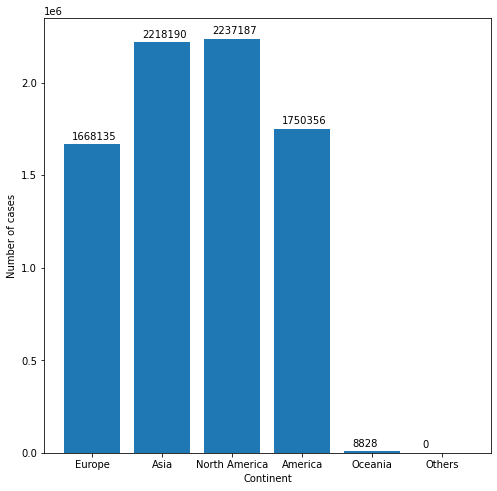

In [14]:
continents=["Europe","Asia","North America","America","Oceania","Others"]
cases=[asia.cases.sum(),europe.cases.sum(),north_america.cases.sum(),america.cases.sum(),oceania.cases.sum(),others.cases.sum()]
plt.figure(figsize=(8,8))

plt.bar(continents,cases)
plt.ylabel("Number of cases")
plt.xlabel('Continent')
for i, j in enumerate(cases):
        plt.text(i-0.29,j+25000,str(j))

Its important to note that China stopped reporting there numbers

Total number of people who were infected by the virus globally

In [15]:
totalcases=asia.cases.sum()+europe.cases.sum()+north_america.cases.sum()+america.cases.sum()+oceania.cases.sum()+others.cases.sum()
totalcases

7882696

Total number of deaths globally

In [16]:
totaldeaths=asia.deaths.sum()+america.deaths.sum()+oceania.deaths.sum()+others.deaths.sum()+europe.deaths.sum()+north_america.deaths.sum()
totaldeaths

436483

Global fatality rate

In [17]:
global_fatality_rate=totaldeaths/totalcases
global_fatality_rate

0.055372299020538154

Time series analysis of the spread of the pandemic

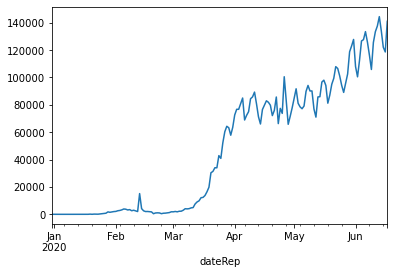

In [18]:
world.cases.resample('D').sum().plot()


Countries with the highest rate of new cases aka spread


In [197]:
today=world[str(world.index[0])[0:10]]
yesterday=world[str(world.index[1])[0:10]]
increase={}
for i in today.countriesAndTerritories.unique():
    hike=today.cases[today.countriesAndTerritories==i][0]-yesterday.cases[yesterday.countriesAndTerritories==i][0]
    increase[i]=hike
increase=pd.DataFrame(list(increase.items()),columns=['country','increase'])
increase=increase.sort_values('increase',ascending=False)
increase.set_index('country',inplace=True)

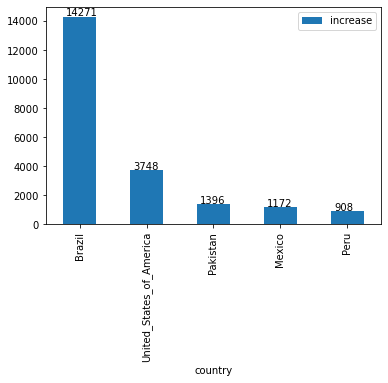

In [198]:
increase.head().plot(kind='bar')
for i, j in enumerate(increase.head().increase):
        plt.text(i-0.20,j+j*0.0085,str(j))

Enter your country of choice to get all related stats

In [204]:
choice="Brazil"


In [205]:
country=world[world.countriesAndTerritories==choice]
country.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
dateRep,,,,,,,,,,
2020-06-17,17,6,2020,34918,1282,Brazil,BR,BRA,209469333,America
2020-06-16,16,6,2020,20647,627,Brazil,BR,BRA,209469333,America
2020-06-15,15,6,2020,17110,612,Brazil,BR,BRA,209469333,America
2020-06-14,14,6,2020,21704,892,Brazil,BR,BRA,209469333,America
2020-06-13,13,6,2020,25982,909,Brazil,BR,BRA,209469333,America


Text(0, 0.5, 'cases')

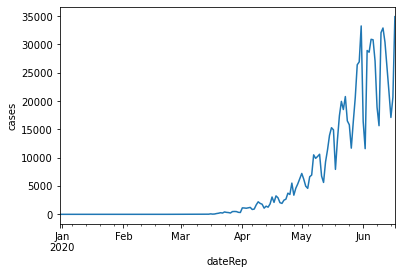

In [206]:
country.cases.plot()
plt.ylabel('cases')

Text(0, 0.5, 'Deaths')

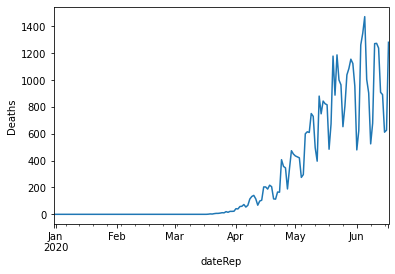

In [207]:
country.deaths.plot()
plt.ylabel('Deaths')